## **LAPTOP DATASET - EXPLORATORY DATA ANALYSIS**


---





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../laptop.csv')

In [7]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [8]:
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


In [9]:
# Drop unnecessary index column if exists
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [10]:
# Shape and column names
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

Shape: (3976, 17)

Columns:
 ['Brand', 'Name', 'Price', 'Processor_Name', 'Processor_Brand', 'RAM_Expandable', 'RAM', 'RAM_TYPE', 'Ghz', 'Display_type', 'Display', 'GPU', 'GPU_Brand', 'SSD', 'HDD', 'Adapter', 'Battery_Life']


In [11]:
# Data types and null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Brand            3976 non-null   object
 1   Name             3976 non-null   object
 2   Price            3976 non-null   int64 
 3   Processor_Name   3976 non-null   object
 4   Processor_Brand  3976 non-null   object
 5   RAM_Expandable   3976 non-null   object
 6   RAM              3976 non-null   object
 7   RAM_TYPE         3976 non-null   object
 8   Ghz              3976 non-null   object
 9   Display_type     3976 non-null   object
 10  Display          3976 non-null   object
 11  GPU              3968 non-null   object
 12  GPU_Brand        3972 non-null   object
 13  SSD              3976 non-null   object
 14  HDD              3976 non-null   object
 15  Adapter          3976 non-null   object
 16  Battery_Life     3558 non-null   object
dtypes: int64(1), object(16)
memory us

## **Cast to correct data types**

In [12]:
df['Brand'] = df['Brand'].astype('category')
df['Name'] = df['Name'].astype('category')
df['Processor_Name'] = df['Processor_Name'].astype('category')
df['Processor_Brand'] = df['Processor_Brand'].astype('category')
df['RAM_Expandable'] = df['RAM_Expandable'].astype('category')
df['RAM_TYPE'] = df['RAM_TYPE'].astype('category')
df['Display_type'] = df['Display_type'].astype('category')
df['GPU'] = df['GPU'].astype('category')
df['GPU_Brand'] = df['GPU_Brand'].astype('category')


In [13]:
# Clean RAM column → extract only numbers
df["RAM"] = df["RAM"].astype(str).str.extract(r'(\d+)').astype(int)

# Convert to string
df["Ghz"] = df["Ghz"].astype(str)
# Extract only numeric part (e.g. 1.8, 2.5, 4.5)
df["Ghz"] = df["Ghz"].str.extract(r'(\d+\.?\d*)', expand=False)
# Convert to float safely (non-numeric → NaN → fill with 0)
df["Ghz"] = pd.to_numeric(df["Ghz"], errors="coerce").fillna(0)

# Convert to string
df['Display'] = df['Display'].astype(str)
# Extract numeric part only (inch size)
df['Display'] = df['Display'].str.extract(r'(\d+\.?\d*)')[0]
# Convert to float
df['Display'] = pd.to_numeric(df['Display'], errors='coerce').fillna(0)


# Convert everything to string
df["SSD"] = df["SSD"].astype(str)
# Replace variations
df["SSD"] = df["SSD"].replace("nan", "0 GB SSD")  # handle nan as text
df["SSD"] = df["SSD"].replace("NO SSD", "0 GB SSD")
# Extract only numbers
df["SSD"] = df["SSD"].str.extract(r'(\d+)').fillna(0).astype(int)

# Convert everything to string
df["HDD"] = df["HDD"].astype(str)
# Replace variations
df["HDD"] = df["HDD"].replace("nan", "0 GB HDD Storage")   # NaN as text
df["HDD"] = df["HDD"].replace("No HDD", "0 GB HDD Storage")
# Extract only numeric values
df["HDD"] = df["HDD"].str.extract(r'(\d+)').fillna(0).astype(int)


# Replace 'no' with 0
df["Adapter"] = df["Adapter"].replace("no", "0")
# Convert to int
df["Adapter"] = df["Adapter"].astype(int)


# Fill NaN with "0"
df["Battery_Life"] = df["Battery_Life"].fillna("0")
# Keep only rows with "Hrs" keyword, else convert to "0 Hrs Battery Life"
df["Battery_Life"] = df["Battery_Life"].apply(
    lambda x: str(x) if "hr" in str(x).lower() else "0 Hrs Battery Life"
)
# Extract numeric values (hours)
df["Battery_Hours"] = df["Battery_Life"].str.extract(r'(\d+\.?\d*)', expand=False)
df["Battery_Hours"] = pd.to_numeric(df["Battery_Hours"], errors='coerce').fillna(0)
# Optional: Keep "Hrs" text column
df["Battery_Life"] = df["Battery_Hours"].astype(str) + " Hrs"

In [14]:
df.head()

,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life,Battery_Hours
0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4,DDR4 RAM,2.0,LED,11.6,Integrated Graphics,MediaTek,64,0,45,12.0 Hrs,12.0
1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8,DDR4 RAM,4.0,LCD,15.6,Radeon,AMD,512,0,65,11.0 Hrs,11.0
2,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16,DDR5 RAM,3.3,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512,0,56,10.0 Hrs,10.0
3,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8,DDR4 RAM,4.2,LCD,15.6,Iris Xe,Intel,512,0,0,7.3 Hrs,7.3
4,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8,LPDDR4X RAM,1.7,LCD,15.6,UHD,Intel,512,0,45,8.0 Hrs,8.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Brand            3976 non-null   category
 1   Name             3976 non-null   category
 2   Price            3976 non-null   int64   
 3   Processor_Name   3976 non-null   category
 4   Processor_Brand  3976 non-null   category
 5   RAM_Expandable   3976 non-null   category
 6   RAM              3976 non-null   int64   
 7   RAM_TYPE         3976 non-null   category
 8   Ghz              3976 non-null   float64 
 9   Display_type     3976 non-null   category
 10  Display          3976 non-null   float64 
 11  GPU              3968 non-null   category
 12  GPU_Brand        3972 non-null   category
 13  SSD              3976 non-null   int64   
 14  HDD              3976 non-null   int64   
 15  Adapter          3976 non-null   int64   
 16  Battery_Life     3976 non-null   object  


# **Handling Missing Values**

In [16]:
#Missing values count
def missing_values(df):
    missing = df.isnull().sum()
    missing = missing[missing>0]
    missing.sort_values(ascending=False)
    return missing

missing_values(df)


GPU          8
GPU_Brand    4
dtype: int64

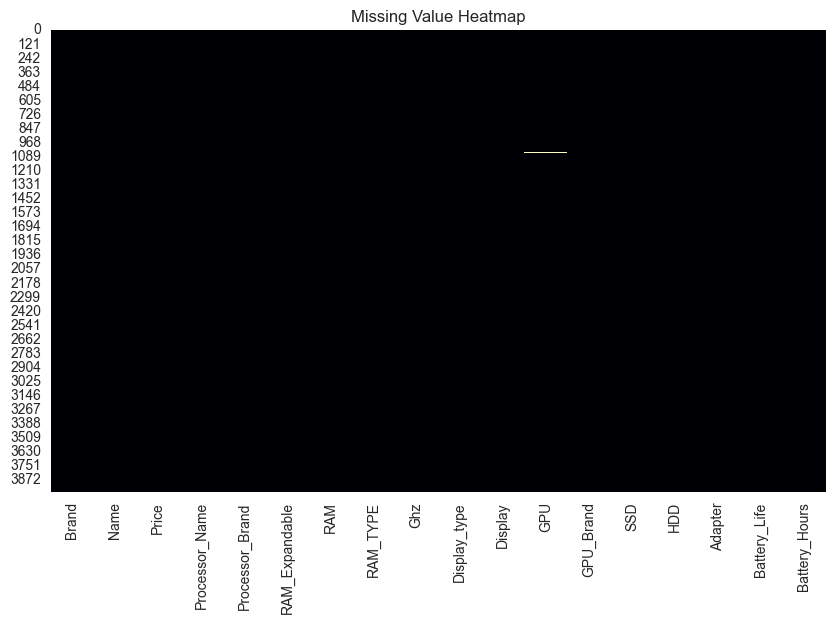

In [17]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='magma')
plt.title("Missing Value Heatmap")
plt.show()

In [18]:
df = df.dropna()
missing_values(df)

Series([], dtype: int64)

In [19]:
#Unique Values Count (Categorical Insight)
df.nunique().sort_values(ascending=False)


Name               3929
Price              1797
GPU                 297
Processor_Name      125
Battery_Life         88
Battery_Hours        88
Adapter              68
Brand                31
Ghz                  31
Display              31
Processor_Brand      19
RAM_TYPE             19
RAM                  12
SSD                  12
GPU_Brand            11
RAM_Expandable       10
HDD                   5
Display_type          2
dtype: int64

# **Duplicate Handling**

In [20]:
# 1. Check number of duplicate rows
duplicates = df.duplicated().sum()
print("Number of duplicate rows before removal:", duplicates)

# 2. Show suspected duplicate rows (for verification)
if duplicates > 0:
    dup_rows = df[df.duplicated(keep=False)]
    print("\nDuplicate rows detected:\n", dup_rows)

# 3. Drop duplicate rows
df = df.drop_duplicates()

# 4. Confirm removal
duplicates_after = df.duplicated().sum()
print("\nNumber of duplicate rows after removal:", duplicates_after)
print("Shape of dataset after removal:", df.shape)


Number of duplicate rows before removal: 4

Duplicate rows detected:
        Brand                                               Name  Price  \
22    Lenovo  Lenovo Ideapad 3 15ITL6 (82H801L7IN) Laptop (1...  33900   
152       HP  HP 15s-du1044tu (18N71PA) Laptop (15.6 Inch | ...  22071   
177     Acer  Acer Aspire 5 A514-53 (NX.HZ6SI.001) Laptop (1...  27775   
332   Lenovo  Lenovo Ideapad Gaming 3 15ACH6 (82K200X3IN) La...  81990   
2867  Lenovo  Lenovo Ideapad 3 15ITL6 (82H801L7IN) Laptop (1...  33900   
3018      HP  HP 15s-du1044tu (18N71PA) Laptop (15.6 Inch | ...  22071   
3104    Acer  Acer Aspire 5 A514-53 (NX.HZ6SI.001) Laptop (1...  27775   
3321  Lenovo  Lenovo Ideapad Gaming 3 15ACH6 (82K200X3IN) La...  81990   

                Processor_Name Processor_Brand     RAM_Expandable  RAM  \
22    Intel Core i3 (11th Gen)           Intel   12 GB Expandable    8   
152    Intel Celeron Dual-Core           Intel     Not Expandable    4   
177   Intel Core i3 (10th Gen)           

# **How many laptops are available by each brand**

C:\Users\RTK\AppData\Local\Temp\ipykernel_1832\1540069422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Brand', data=df, palette="husl")


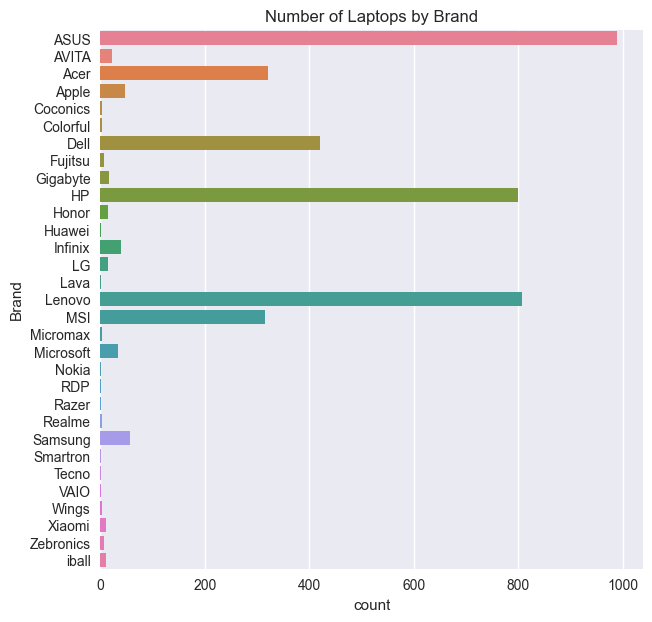

In [21]:
plt.figure(figsize=(7,7))
sns.countplot(y='Brand', data=df, palette="husl")
plt.title("Number of Laptops by Brand")
plt.show()


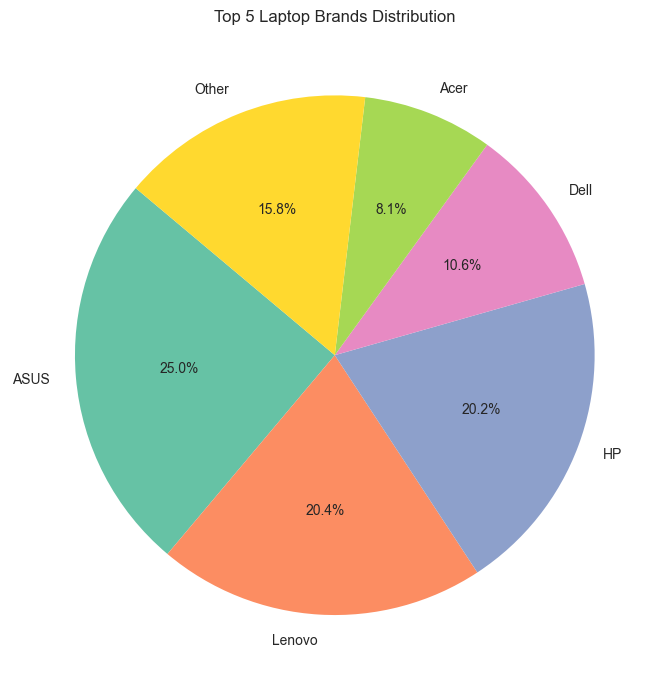

In [22]:
# Count brands
brand_counts = df['Brand'].value_counts()

# Keep only top 5, group others as "Other"
top5 = brand_counts[:5]
others = brand_counts[5:].sum()
top5['Other'] = others

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(top5, labels=top5.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette("Set2"))

plt.title('Top 5 Laptop Brands Distribution')
plt.tight_layout()
plt.show()


# **Price Distribution Histogram**

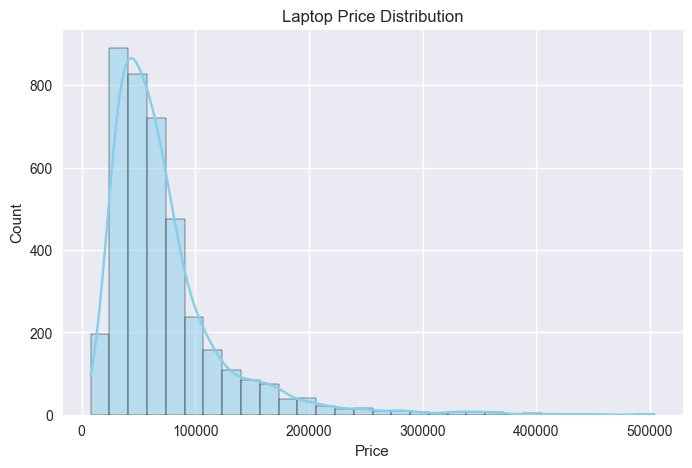

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue',edgecolor = 'black')
plt.title("Laptop Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


# **Laptop Price Trends by RAM, SSD and Brand**

C:\Users\RTK\AppData\Local\Temp\ipykernel_1832\3914784153.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RAM', y='Price', data=df, palette="Set2")


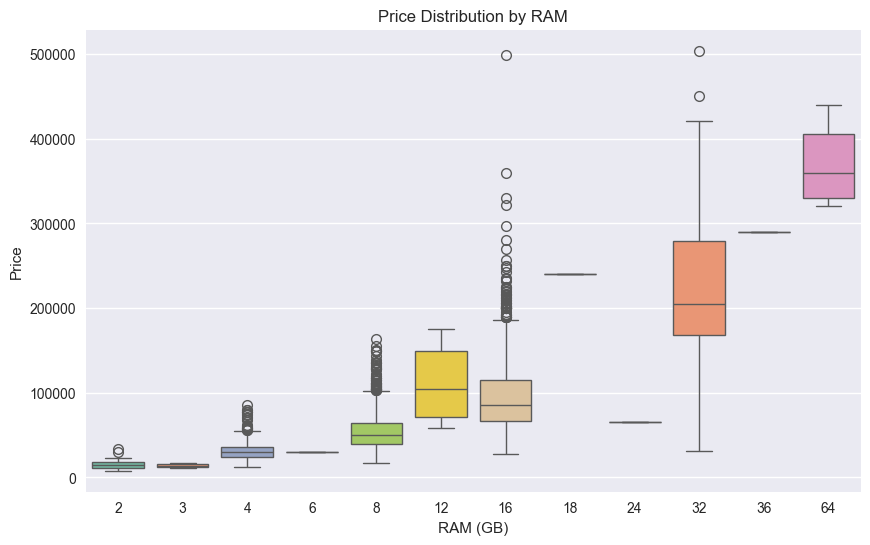

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RAM', y='Price', data=df, palette="Set2")
plt.title('Price Distribution by RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.show()

C:\Users\RTK\AppData\Local\Temp\ipykernel_1832\3667726729.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SSD', y='Price', data=df, palette="Set2")


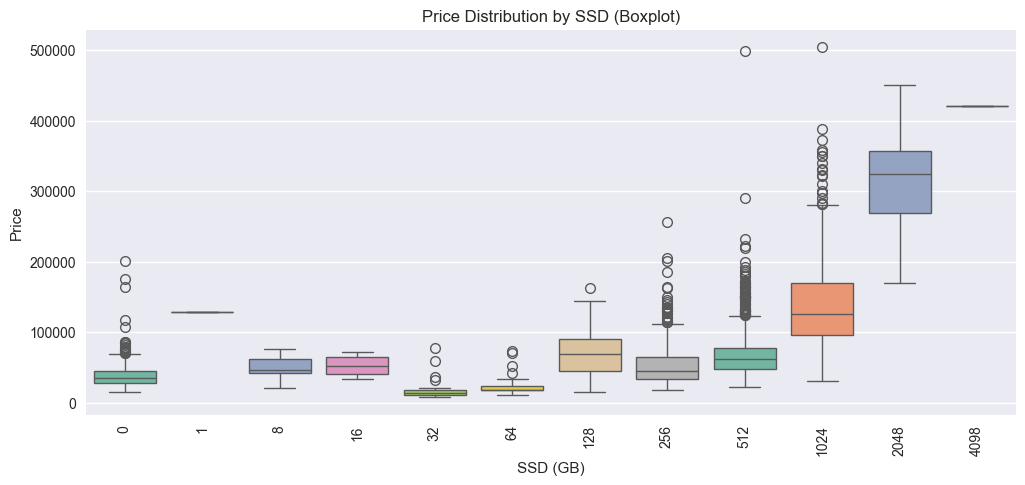

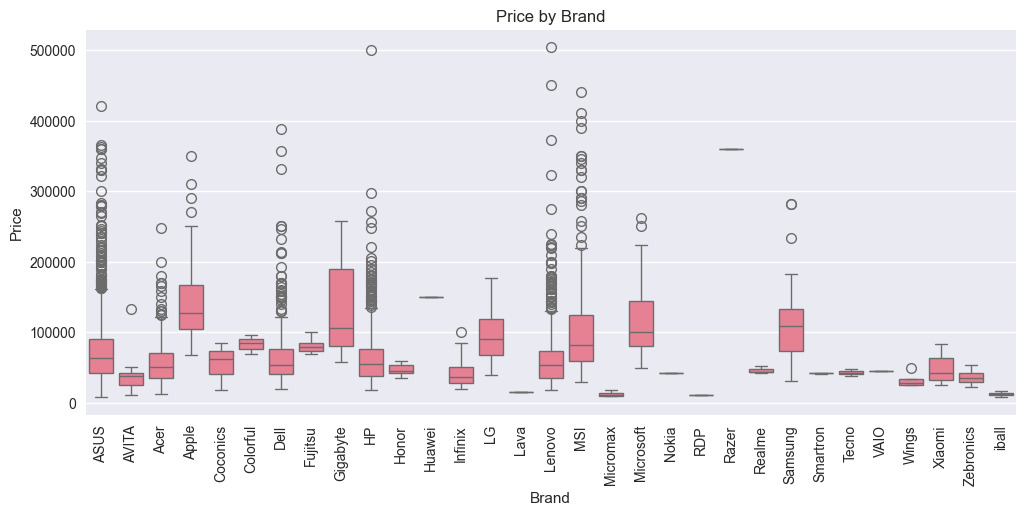

In [25]:
    # Boxplot: SSD vs Price
    plt.figure(figsize=(12,5))
    sns.boxplot(x='SSD', y='Price', data=df, palette="Set2")
    plt.xticks(rotation=90)
    plt.title('Price Distribution by SSD (Boxplot)')
    plt.xlabel('SSD (GB)')
    plt.ylabel('Price')
    plt.show()


    # Boxplot: Brand vs Price
    if 'Brand' in df.columns:
        plt.figure(figsize=(12, 5))
        sns.boxplot(x='Brand', y='Price', data=df)
        plt.xticks(rotation=90)
        plt.title('Price by Brand')
        plt.show()


# **Display Types availabel in laptop.**

C:\Users\RTK\AppData\Local\Temp\ipykernel_1832\1426160121.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Display_type', data=df, palette="Set2")


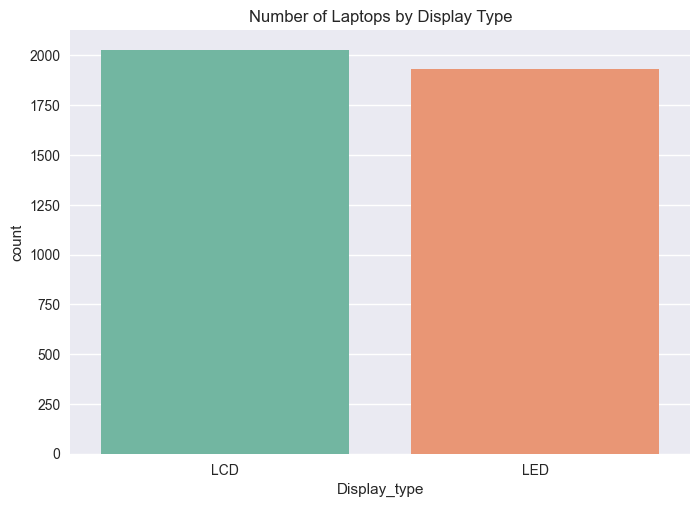

In [26]:
sns.countplot(x='Display_type', data=df, palette="Set2")
plt.title("Number of Laptops by Display Type")
plt.show()


# **Histogram for Display sizes**

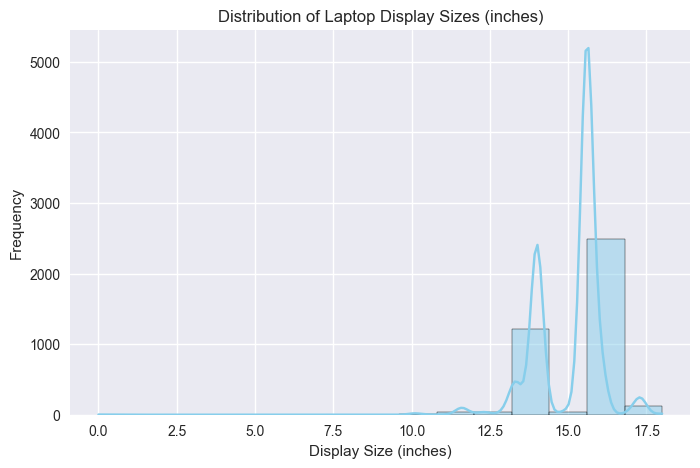

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Display'], kde=True, bins=15, color="skyblue", edgecolor="black")
plt.title("Distribution of Laptop Display Sizes (inches)")
plt.xlabel("Display Size (inches)")
plt.ylabel("Frequency")
plt.show()

# **RAM Expandable Status**

C:\Users\RTK\AppData\Local\Temp\ipykernel_1832\152120441.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RAM_Expandable_Status', data=df, palette=['#FF9999','#66B3FF'])  # Red + Blue


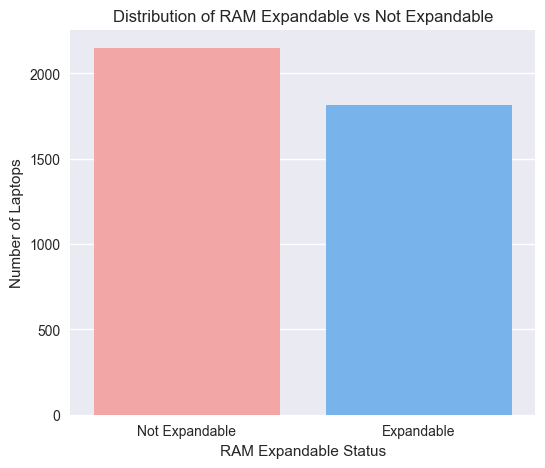

In [28]:
# Categorical column
df['RAM_Expandable_Status'] = df['RAM_Expandable'].apply(lambda x: 'Not Expandable' if 'Not' in x else 'Expandable')

# Plot countplot with custom colors
plt.figure(figsize=(6,5))
sns.countplot(x='RAM_Expandable_Status', data=df, palette=['#FF9999','#66B3FF'])  # Red + Blue

plt.xlabel("RAM Expandable Status")
plt.ylabel("Number of Laptops")
plt.title("Distribution of RAM Expandable vs Not Expandable")
plt.show()


# **Heat Map**

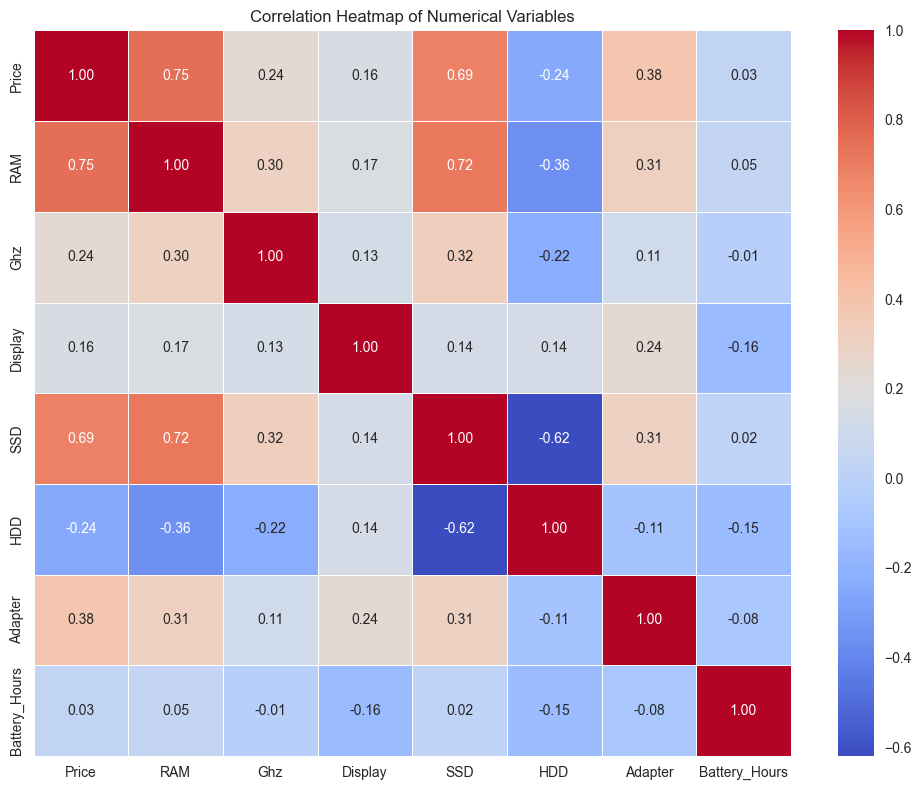

In [29]:
numerical_df = df.select_dtypes(include=['number'])
corr = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

# **Battery Life Density Plot**

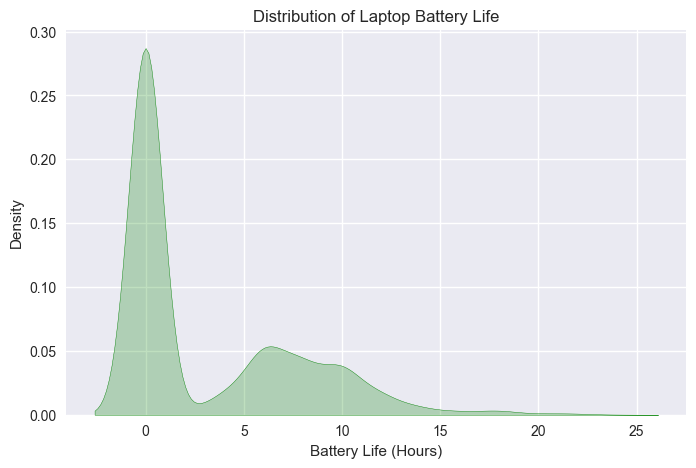

In [30]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Battery_Hours'], fill=True, color='green')
plt.xlabel("Battery Life (Hours)")
plt.ylabel("Density")
plt.title("Distribution of Laptop Battery Life")
plt.show()


# **Relationship Between Key Laptop Features and Price**

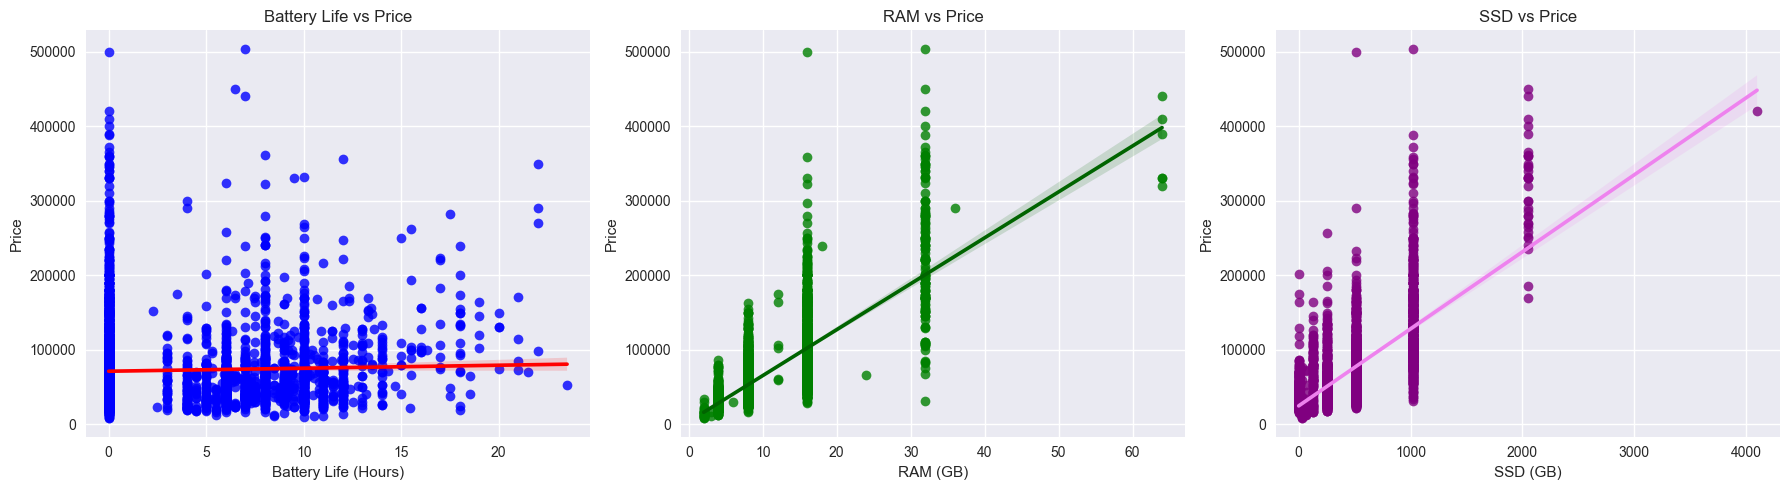

In [31]:
plt.figure(figsize=(18,5))  # Wide figure for 3 plots side by side

# Battery Life vs Price
plt.subplot(1, 3, 1)
sns.regplot(data=df, x='Battery_Hours', y='Price', color='blue', line_kws={'color':'red'})
plt.xlabel('Battery Life (Hours)')
plt.ylabel('Price')
plt.title('Battery Life vs Price')

# RAM vs Price
plt.subplot(1, 3, 2)
sns.regplot(data=df, x='RAM', y='Price', color='green', line_kws={'color':'darkgreen'})
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.title('RAM vs Price')

# SSD vs Price
plt.subplot(1, 3, 3)
sns.regplot(data=df, x='SSD', y='Price', color='purple', line_kws={'color':'violet'})
plt.xlabel('SSD (GB)')
plt.ylabel('Price')
plt.title('SSD vs Price')

plt.tight_layout()
plt.show()


In [32]:
# Summary statistics
df.describe(include='all')

,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life,Battery_Hours,RAM_Expandable_Status
count,3960,3960,3960.000000,3960,3960,3960,3960.000000,3960,3960.000000,3960,3960.000000,3960,3960,3960.000000,3960.000000,3960.000000,3960,3960.000000,3960
unique,31,3929,NaN,125,19,10,NaN,19,NaN,2,NaN,297,11,NaN,NaN,NaN,88,NaN,2
top,ASUS,Acer Aspire 3 A314-35 (UN.K0SSI.031) Laptop (1...,NaN,Intel Core i5 (11th Gen),Intel,Not Expandable,NaN,DDR4 RAM,NaN,LCD,NaN,UHD,Intel,NaN,NaN,NaN,0.0 Hrs,NaN,Not Expandable
freq,989,2,NaN,316,2996,2148,NaN,1503,NaN,2026,NaN,649,1928,NaN,NaN,NaN,2467,NaN,2148
mean,NaN,NaN,72401.461869,NaN,NaN,NaN,11.145960,NaN,2.605606,NaN,15.064318,NaN,NaN,462.192677,246.684091,64.670202,NaN,3.166308,NaN
std,NaN,NaN,52206.583912,NaN,NaN,NaN,6.361383,NaN,1.269008,NaN,1.058204,NaN,NaN,347.845224,445.966651,58.917552,NaN,4.538575,NaN
min,NaN,NaN,7990.000000,NaN,NaN,NaN,2.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,NaN,NaN,39887.500000,NaN,NaN,NaN,8.000000,NaN,1.700000,NaN,14.000000,NaN,NaN,256.000000,0.000000,41.000000,NaN,0.000000,NaN
50%,NaN,NaN,58990.000000,NaN,NaN,NaN,8.000000,NaN,2.400000,NaN,15.600000,NaN,NaN,512.000000,0.000000,65.000000,NaN,0.000000,NaN
75%,NaN,NaN,84990.000000,NaN,NaN,NaN,16.000000,NaN,3.400000,NaN,15.600000,NaN,NaN,512.000000,0.000000,65.000000,NaN,6.500000,NaN


## **Custom Summary Table**

In [33]:
price = df['Price'].dropna()

In [34]:
summary = {
    "Count": df['Price'].count(),
    "Mean": df['Price'].mean(),
    "Median": df['Price'].median(),
    "Mode": df['Price'].mode()[0],
    "Min": df['Price'].min(),
    "Max": df['Price'].max(),
    "Variance": df['Price'].var(),
    "Standard Deviation": df['Price'].std(),
    "IQR (Q3 - Q1)": df['Price'].quantile(0.75) - df['Price'].quantile(0.25),
    "Range": df['Price'].max() - df['Price'].min()
}

# Convert to DataFrame (row format)
summary_table = pd.DataFrame(summary, index=["Price"])

# Transpose for cleaner display
summary_table_T = summary_table.T

# Format numbers with commas and 2 decimals (remove scientific notation)
summary_table_T = summary_table_T.applymap(lambda x: f"{x:,.2f}")

print("\n📊 Summary of 'Price' Column:\n")
print(summary_table_T)



📊 Summary of 'Price' Column:

                               Price
Count                       3,960.00
Mean                       72,401.46
Median                     58,990.00
Mode                       64,990.00
Min                         7,990.00
Max                       503,890.00
Variance            2,725,527,403.73
Standard Deviation         52,206.58
IQR (Q3 - Q1)              45,102.50
Range                     495,900.00


C:\Users\RTK\AppData\Local\Temp\ipykernel_1832\952874863.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary_table_T = summary_table_T.applymap(lambda x: f"{x:,.2f}")


## **Summary Measures Using Pandas**



In [35]:
desc = price.describe()
desc['Mode'] = price.mode().iloc[0]  #Since .describe() does not include the mode, use .mode() like this

In [36]:
desc

count      3960.000000
mean      72401.461869
std       52206.583912
min        7990.000000
25%       39887.500000
50%       58990.000000
75%       84990.000000
max      503890.000000
Mode      64990.000000
Name: Price, dtype: float64